<a href="https://colab.research.google.com/github/gemstoneyang/2023_Machine_Learning/blob/main/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Polynomial curve fitting

In [ ]:

# N: The number of data samples
# M: The order of the polynomial function
def polynomial_curve_fitting(x, t, N, M):
  A = np.zeros((M+1, M+1))
  tau = np.zeros((M+1, 1))

  # Prepare matrix Aij
  for i in range(0, M+1):
    for j in range(0, M+1):
      temp_sum_A = 0
      for n in range(0, N):
        temp_sum_A += x[n] ** (i+j)
      A[i][j] = temp_sum_A

  # Prepare vector tau
  for i in range(0, M+1):
    temp_sum_tau = 0
    for n in range(0, N):
      temp_sum_tau += (x[n]**i)*t[n]
    tau[i] = temp_sum_tau

  # 1: Closed-form solution
  w = np.linalg.solve(A, tau) # Solve the linear matrix equation

  # 2: Polynomial curve fitting solution
  z = np.polyfit(x, t, M) # Polynomial fitting function in Numpy

  # print('Polynomial coefficients (w) (Closed-form): \n', w)
  # print('Polynomial coefficients (w) (Fitting):', z)

  # Generate data from age 0-12
  x_pred = np.array([i for i in range(0, 13)]) # Age 0-12
  y_pred = np.zeros(13)
  for i, val in enumerate(x_pred):
    for j in range(0, M+1):
      y_pred[i] += w[j]*(val**(j)) # Calculate prediction
  return y_pred


# Error calculation

In [ ]:
M_train = [i for i in range(1, 8)]
E_train = []

# Test error
M_test = [i for i in range(1, 8)]
E_test = []


# Train data
x = [i for i in range(0, 8)] # Generate age data
t = [49.88, 75.74, 87.11, 96.49, 103.07, 109.58, 115.91, 122.05] # Generate height data

# Test data
x_test = [i for i in range(8, 13)]
t_test = [127.87, 133.41, 138.84, 144.70, 151.42]

for i in M_train:
  y_pred = polynomial_curve_fitting(x, t, len(x), i)
    # Training error
  error = 0
  for n in range(0, 8):
    error += (y_pred[n] - t[n])**2
  error *= 0.5
  E_train.append(error)

  test_error = 0
  for n in range(8, 13):
    test_error += (y_pred[n] - t_test[n-8])**2
  test_error *= 0.5
  E_test.append(test_error)


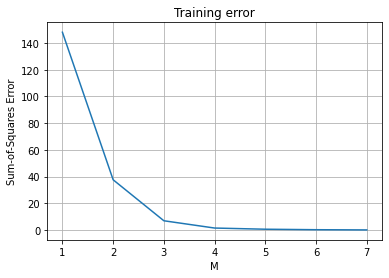

In [ ]:
# Plotting function
plt.plot(M_train, E_train)
plt.title('Training error')
plt.xlabel('M')
plt.ylabel('Sum-of-Squares Error')
plt.grid()

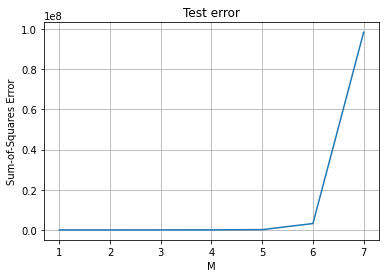

In [ ]:
# Plotting function
plt.plot(M_test, E_test)
plt.title('Test error')
plt.xlabel('M')
plt.ylabel('Sum-of-Squares Error')
plt.grid()